In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (3,3)


In [8]:
class LinearRegression:
    def __init__(self, batch_size=32, regularization=0, max_epochs=100, patience=3):
        """Linear Regression using Gradient Descent.
        Parameters:
        -----------
        batch_size: int
            The number of samples per batch.
        regularization: float
            The regularization parameter.
        max_epochs: int
            The maximum number of epochs.
        patience: int
            The number of epochs to wait before stopping if the validation loss
            does not improve.
        """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.weights = None
        self.bias = None
        

    def fit(self, X, Y, batch_size=32, regularization=0, max_epochs=100, patience=3,lr = 0.001):
        """Fit a linear model.
        Parameters:
        -----------
        batch_size: int
            The number of samples per batch.
        regularization: float
            The regularization parameter.
        max_epochs: int
            The maximum number of epochs.
        patience: int
            The number of epochs to wait before stopping if the validation loss
            does not improve.
        """
        self.batch_size = batch_size
        self.regularization = regularization
        self.max_epochs = max_epochs
        self.patience = patience
        self.lr = lr

        # TODO: Initialize the weights and bias based on the shape of X and y.
        
        #split data in training and validation sets
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)
        
        #rows_sample as no. of row(x.shape[0])
        #column_sample as no. of columns(x.shape[1])
        rows_sample,column_sample = X_train.shape 
        rows1_sample,column1_sample = Y_train.shape 

        #create local variables weight and bias
        weights = np.random.rand(column_sample,column1_sample)#initialize weight as random based on columns of X and Y train
        bias = 0 #bias intialized as 0 above
        
        #for storing MSE and Steps to plot
        arr_mse =[]                      
        arr_steps=[]
        
        # TODO: Implement the training loop.
        best_val_loss = float("inf")
        count = 0
        for j in range(self.max_epochs):
            #generate random numbers using numpy of size of sample
            random_num = np.random.permutation(rows_sample)
            
            X_new = X_train[random_num]
            Y_new = Y_train[random_num]
            
            #generate values from 0 to sample size with batch size of 32
            for i in range(0, rows_sample, batch_size):
                X_batch = X_new[i : i+batch_size]       #taking X batch
                Y_batch = Y_new[i : i+batch_size]       #taking Y batch
                
                #calculate y_pred for each batch on training data
                Y_pred = np.dot(X_batch,weights) + bias
                
                dw = (2/rows_sample) * np.dot(X_batch.T,(Y_pred-Y_batch))
                db = (2/rows_sample) * np.sum(Y_pred-Y_batch)
                
                #Calculate regularization
                reg=self.regularization*sum(pow(weights,2))
                reg=np.sum(reg)

                #update values weight and bias
                weights = (weights-self.lr * dw)- reg
                bias = bias - self.lr * db - reg
                
                #Calculate MSE
                mse = np.mean( ( Y_batch - Y_pred)**2)
                
            # Evaluate the loss on the validation set
            val_mse = np.mean((Y_val - (np.dot(X_val, weights) + bias)) ** 2)- reg


            # Check if the validation loss has improved
            if val_mse < best_val_loss:
                best_val_loss = val_mse
                count = 0
            else:
                count += 1

            # If the loss on the validation set increases for 3 consecutive steps, stop training.
            if count == self.patience:
                break
            
            #append values of validation mse and number of steps(j) to list
            arr_mse.append(val_mse)
            arr_steps.append(j)

        self.weights=weights
        self.bias=bias

        plt.figure(figsize=(7,7))
        plt.plot(arr_steps,arr_mse)
        plt.scatter(arr_steps, arr_mse)
        plt.xlabel("Steps", fontsize=14)
        plt.ylabel("Loss", fontsize = 14)
        plt.show()
        plt.show() 

    def predict(self, X):
        """Predict using the linear model.
        Parameters
        ----------
        X: numpy.ndarray
            The input data.
        """
        # TODO: Implement the prediction function.
        Y_pred = np.dot(X,self.weights)+self.bias
        return Y_pred
    
    def score(self,X,Y):
        """Evaluate the linear model using the mean squared error.
        Parameters
        ----------
        X: numpy.ndarray
            The input data.
        y: numpy.ndarray
            The target data.
        """
        # TODO: Implement the scoring function.
        
        Y_pred = self.predict(X)
        y_minus= (Y - Y_pred)**2
        y_col_sum = y_minus.sum(axis=0)
        divider = X.shape[0]*Y.shape[1]
        
        score = y_col_sum/divider
        return score
    
    
    

In [9]:
iris = load_iris()
iris_dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# print(iris_dataset)
# model1_data = iris_dataset[["sepal length (cm)", "sepal width (cm)", "petal length (cm)"]]
# X = np.array(model1_data.iloc[:,:-1])
# Y = np.array(model1_data.iloc[:,-1])
# print(X.shape)
# print(Y.shape)

In [10]:
model1_data = iris_dataset[["sepal length (cm)", "sepal width (cm)", "petal length (cm)"]]
X1 = np.array(model1_data.iloc[:,:-1])
Y1 = np.array(model1_data.iloc[:,-1])
Y1=Y1.reshape(-1,1)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=0)


# Plotting Loss vs MSE for sepal length based on sepal width and petal length

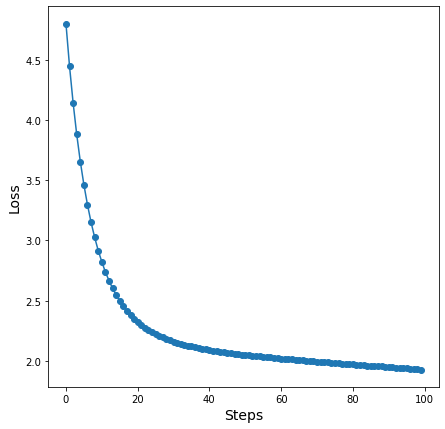

MSE =  [2.66677242]


In [12]:
obj1 = LinearRegression()
obj1.fit(X1_train,Y1_train)

score1 = obj1.score(X1_test,Y1_test)
print("MSE = ", score1)




# Plotting Loss vs MSE for sepal length based on sepal width and petal width

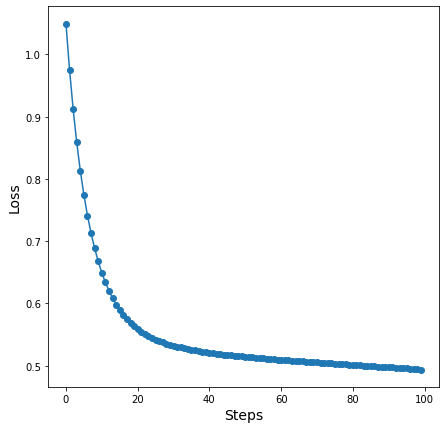

MSE =  [0.36943946]


In [13]:
model2_data = iris_dataset[["sepal length (cm)", "sepal width (cm)", "petal width (cm)"]]
X2 = np.array(model2_data.iloc[:,:-1])
Y2 = np.array(model2_data.iloc[:,-1])
Y2=Y2.reshape(-1,1)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.1, random_state=0)

obj2 = LinearRegression()
obj2.fit(X2_train,Y2_train)


score2 = obj2.score(X2_test,Y2_test)
print("MSE = ", score2)


# Plotting Loss vs MSE for Sepal width based on petal width and length

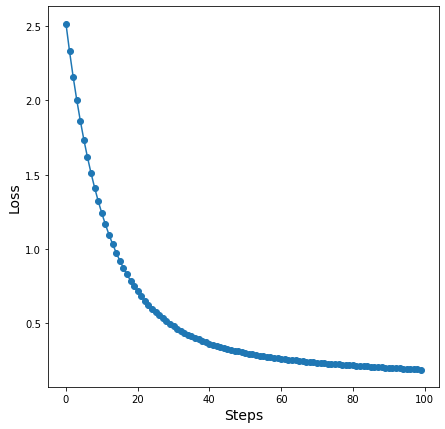

MSE =  [0.1781761]


In [14]:
model3_data = iris_dataset[["sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
X3 = np.array(model3_data.iloc[:,:-1])
Y3 = np.array(model3_data.iloc[:,-1])
Y3=Y3.reshape(-1,1)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.1, random_state=0)

obj3 = LinearRegression()
obj3.fit(X3_train,Y3_train)#petal width based on sepal length and width

score3 = obj3.score(X3_test,Y3_test)
print("MSE = ", score3)


# Plotting Loss vs MSE for petal width based on petal length and petal length  

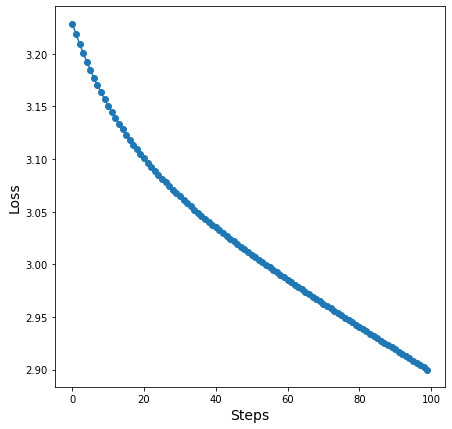

MSE =  [1.7942102]


In [15]:
model4_data = iris_dataset[["petal width (cm)", "petal length (cm)", "sepal width (cm)"]]
X4 = np.array(model4_data.iloc[:,:-1])
Y4 = np.array(model4_data.iloc[:,-1])
Y4=Y4.reshape(-1,1)

X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.1, random_state=0)

obj4 = LinearRegression()
obj4.fit(X4_train,Y4_train)#petal width based on sepal length and width

score4 = obj4.score(X4_test,Y4_test)
print("MSE = ", score4)


# Adding L2 regularization on model 4 : petal width based on petal length and petal length

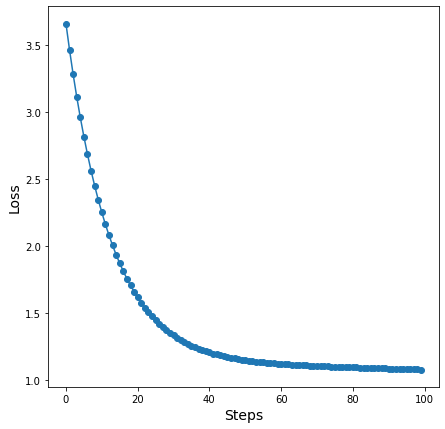

MSE =  [1.668126]


In [49]:
obj5 = LinearRegression()
obj5.fit(X4_train, Y4_train,regularization=.000001)#Sepal length based on petal length and petal width

score5 = obj5.score(X4_test,Y4_test)
print("MSE = ", score5)


# Testing

In [16]:
#List to store all scores
scores=[]
score1 = obj1.score(X1_test,Y1_test)
scores.append(score1)
print("MSE = ", score1)

MSE =  [2.66677242]


In [17]:
score2 = obj2.score(X2_test,Y2_test)
scores.append(score2)
print("MSE = ", score2)


MSE =  [0.36943946]


In [18]:
score3 = obj3.score(X3_test,Y3_test)
scores.append(score3)
print("MSE = ", score3)


MSE =  [0.1781761]


In [19]:
score4 = obj4.score(X4_test,Y4_test)
scores.append(score4)
print("MSE = ", score4)

MSE =  [1.7942102]


In [20]:
MSE=min(scores)# whichever has min score that one is more predictive
print("Minimum MSE = ",MSE)

Minimum MSE =  [0.1781761]


# Whichever has minimum MSE that feature is more predictive of other.

# Regression with Multiple Outputs

In [22]:
import numpy as np
import pandas as pd
import scipy.io as sio


data_path = "data/traffic_dataset.mat"

# The provided data is given in a `.mat` file.
# We can load it using the `scipy.io.loadmat` function.
mat = sio.loadmat(data_path)
input_train = mat['tra_X_tr']
output_train = mat['tra_Y_tr'].T
input_test = mat['tra_X_te']
output_test = mat['tra_Y_te'].T
adj_mat = mat['tra_adj_mat']

input_train = input_train.squeeze()
input_test = input_test.squeeze()

# Convert the sparse matrix to a dense matrix
data = []
test_data = []

for i in range(input_train.shape[0]):
    data.append(input_train[i].todense())

for i in range(input_test.shape[0]):
    test_data.append(input_test[i].todense())

# Convert the data to a numpy array
data = np.array(data)
test_data = np.array(test_data)

samples,x,y = data.shape
#reshape input train data
data = data.reshape((samples,x*y))

samples,x,y = test_data.shape
#reshape test_data
test_data = test_data.reshape((samples,x*y))

# Training of regression for multiple outputs

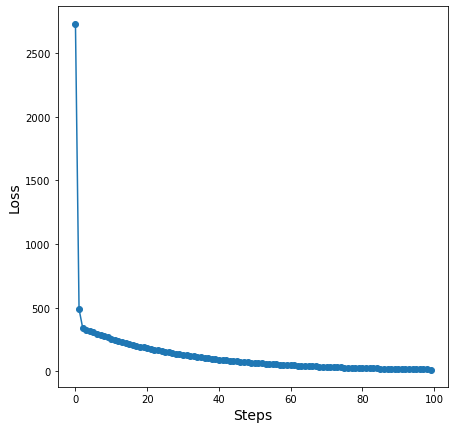

MSE =  [0.44812839 0.42254086 0.40508598 0.41103524 0.42033779 0.46455794
 0.40257852 0.45892601 0.42054378 0.43795545 0.34167686 0.43304106
 0.45200912 0.39295006 0.47105386 0.35556572 0.42292334 0.43932748
 0.40355699 0.42907181 0.39363604 0.42263115 0.4231484  0.37981656
 0.43112027 0.403713   0.46746149 0.38191706 0.47959228 0.55655728
 0.40553733 0.37074874 0.36457737 0.41021786 0.43072027 0.33923451]


In [24]:
model_multi = LinearRegression()
model_multi.fit(data,output_train,batch_size=128,regularization=1e-10)

score_multi = model_multi.score(test_data,output_test)
print("MSE = ", score_multi)

# Testing of regression with multiple outputs

In [26]:
score_multi = model_multi.score(test_data,output_test)
print("MSE = ", score_multi)

MSE =  [0.44812839 0.42254086 0.40508598 0.41103524 0.42033779 0.46455794
 0.40257852 0.45892601 0.42054378 0.43795545 0.34167686 0.43304106
 0.45200912 0.39295006 0.47105386 0.35556572 0.42292334 0.43932748
 0.40355699 0.42907181 0.39363604 0.42263115 0.4231484  0.37981656
 0.43112027 0.403713   0.46746149 0.38191706 0.47959228 0.55655728
 0.40553733 0.37074874 0.36457737 0.41021786 0.43072027 0.33923451]
